In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.8 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
weather_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Drought_dataset_Chuadanga.csv')
weather_df.head()

,Station,Year,Month,Temperature,Rainfall
0,Chuadanga,1994,1,18.8,9.00
1,Chuadanga,1994,2,24.8,15.44
2,Chuadanga,1994,3,28.9,35.33
3,Chuadanga,1994,4,32.9,47.11
4,Chuadanga,1994,5,34.7,119.11


In [ ]:
train_df = weather_df.loc[weather_df['Year'] <= 2016]
train_df = train_df[train_df['Station']=='Chuadanga']
train_df.drop(columns=['Station', 'Month', 'Temperature'], axis=1, inplace=True)
train = train_df['Rainfall']
test_df = weather_df.loc[weather_df['Year'] >= 2017]
test_df = test_df[test_df['Station']=='Chuadanga']
test_df.drop(columns=['Station', 'Month', 'Temperature'], axis=1, inplace=True)
test = test_df['Rainfall']

In [ ]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature/Rainfall")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [ ]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

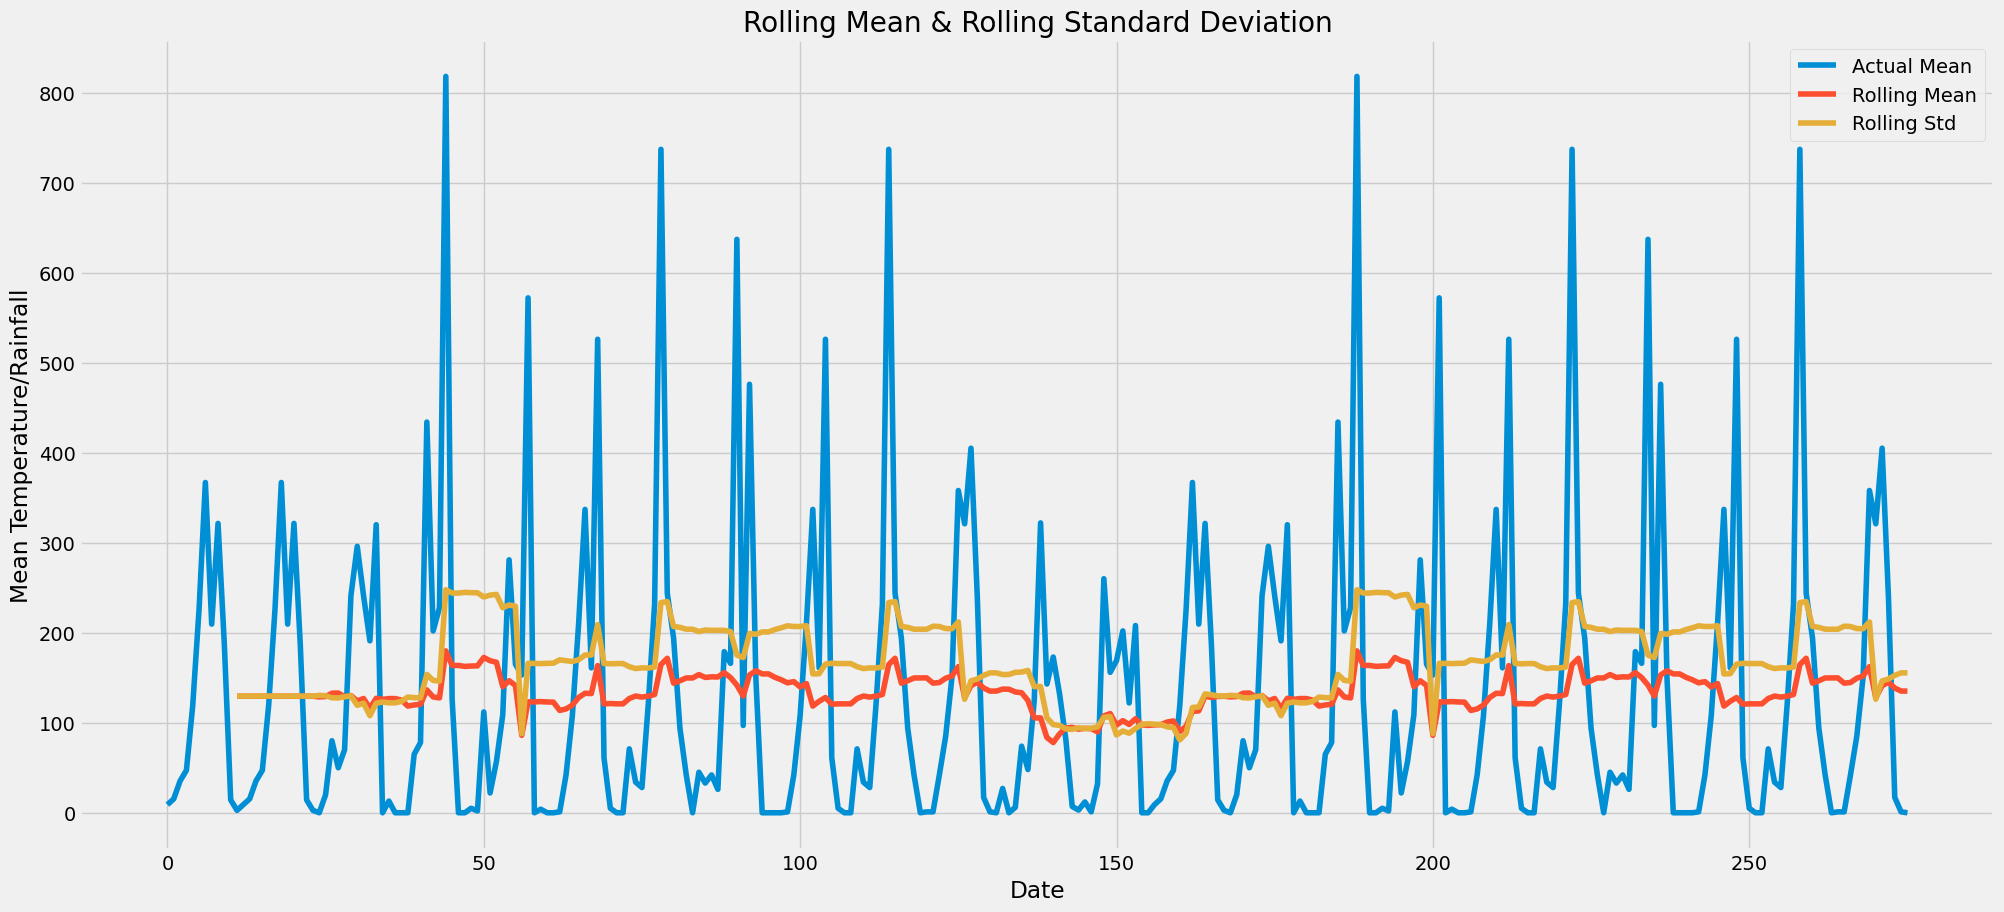

Test statistic:  -3.4661906810022147
Critical Values: {'1%': -3.455558114028747, '5%': -2.872635586277424, '10%': -2.572682677000175}


In [ ]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df.Rainfall)
perform_dickey_fuller_test(train_df.Rainfall)

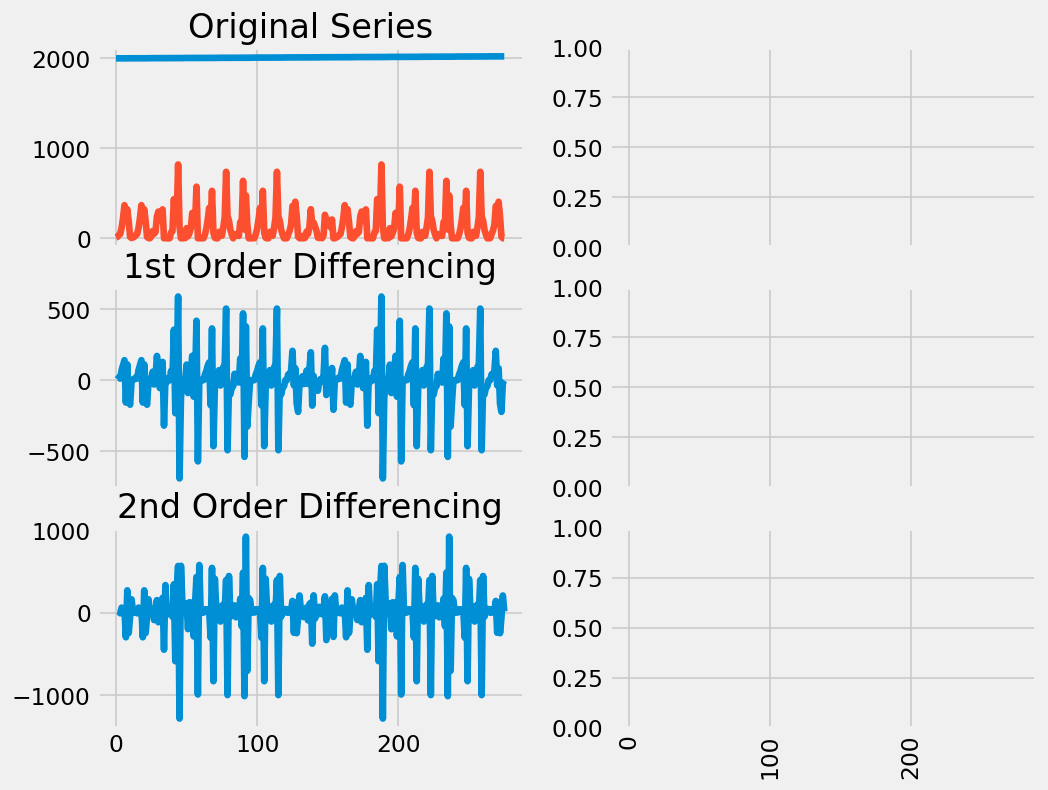

In [ ]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df.values);
axes[0, 0].set_title('Original Series')

# 1st Differencing
axes[1, 0].plot(train_df.Rainfall.diff().values);
axes[1, 0].set_title('1st Order Differencing')

# 2nd Differencing
axes[2, 0].plot(train_df.Rainfall.diff().diff().values);
axes[2, 0].set_title('2nd Order Differencing')

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
stepwise_fit = auto_arima(train, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3548.017, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3607.137, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3573.784, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3582.869, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3743.388, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3567.290, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3573.516, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3557.572, Time=0.61 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3547.009, Time=0.66 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3564.125, Time=0.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=3437.322, Time=0.84 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=3.67 sec
 ARIMA(2,0,5)(0,0,0)[0] intercept   : AIC=inf, T

In [ ]:
val_pred = stepwise_fit.predict(len(test))
df1_val = pd.DataFrame({'Actual Rainfall': test, 'Predicted Rainfall': val_pred})
df1_val[df1_val['Predicted Rainfall']>=0]

,Actual Rainfall,Predicted Rainfall
278,6.0,34.629798
279,74.0,123.825390
280,48.0,215.662836
281,125.0,285.423993
282,322.0,314.421988
283,143.0,295.006417
284,173.0,232.580672
285,132.0,144.099719
286,81.0,53.465582
290,1.0,39.676185


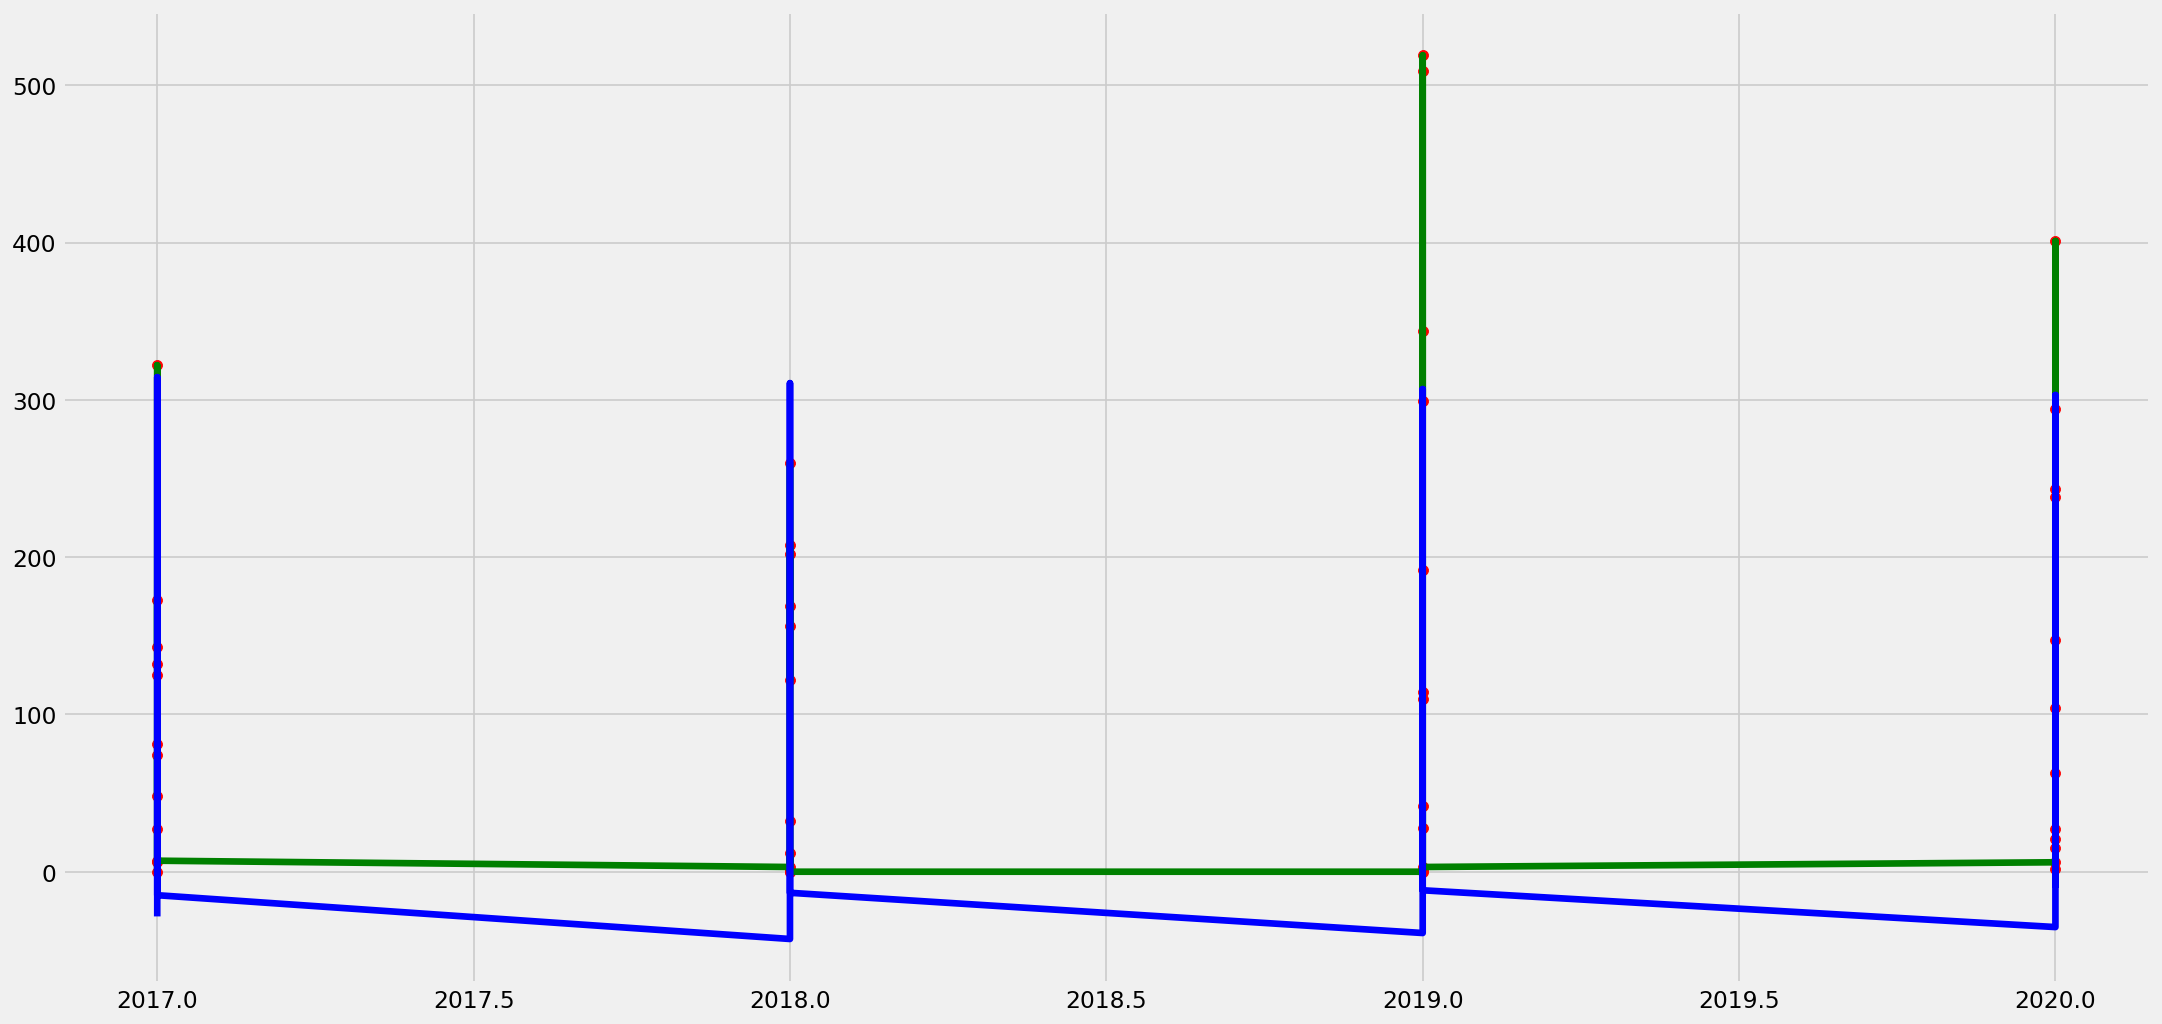

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(test_df['Year'],test,color='red')
plt.plot(test_df['Year'],test,color='green')
plt.plot(test_df['Year'],val_pred,color='blue')

In [ ]:
Y_exp_pred = stepwise_fit.predict(len(test)+228)
df1 = pd.DataFrame({'Predicted Rainfall': Y_exp_pred})
df1[df1['Predicted Rainfall']>=0]

,Predicted Rainfall
278,34.629798
279,123.825390
280,215.662836
281,285.423993
282,314.421988
...,...
547,204.137833
548,152.018003
549,95.479624
550,49.750424


In [ ]:
train_df2 = weather_df.loc[weather_df['Year'] <= 2016]
train_df2 = train_df2[train_df2['Station']=='Chuadanga']
train_df2.drop(columns=['Station', 'Rainfall'], axis=1, inplace=True)
train2 = train_df2['Temperature']
test_df2 = weather_df.loc[weather_df['Year'] >= 2017]
test_df2 = test_df2[test_df2['Station']=='Chuadanga']
test_df2.drop(columns=['Station', 'Rainfall'], axis=1, inplace=True)
test2 = test_df2['Temperature']

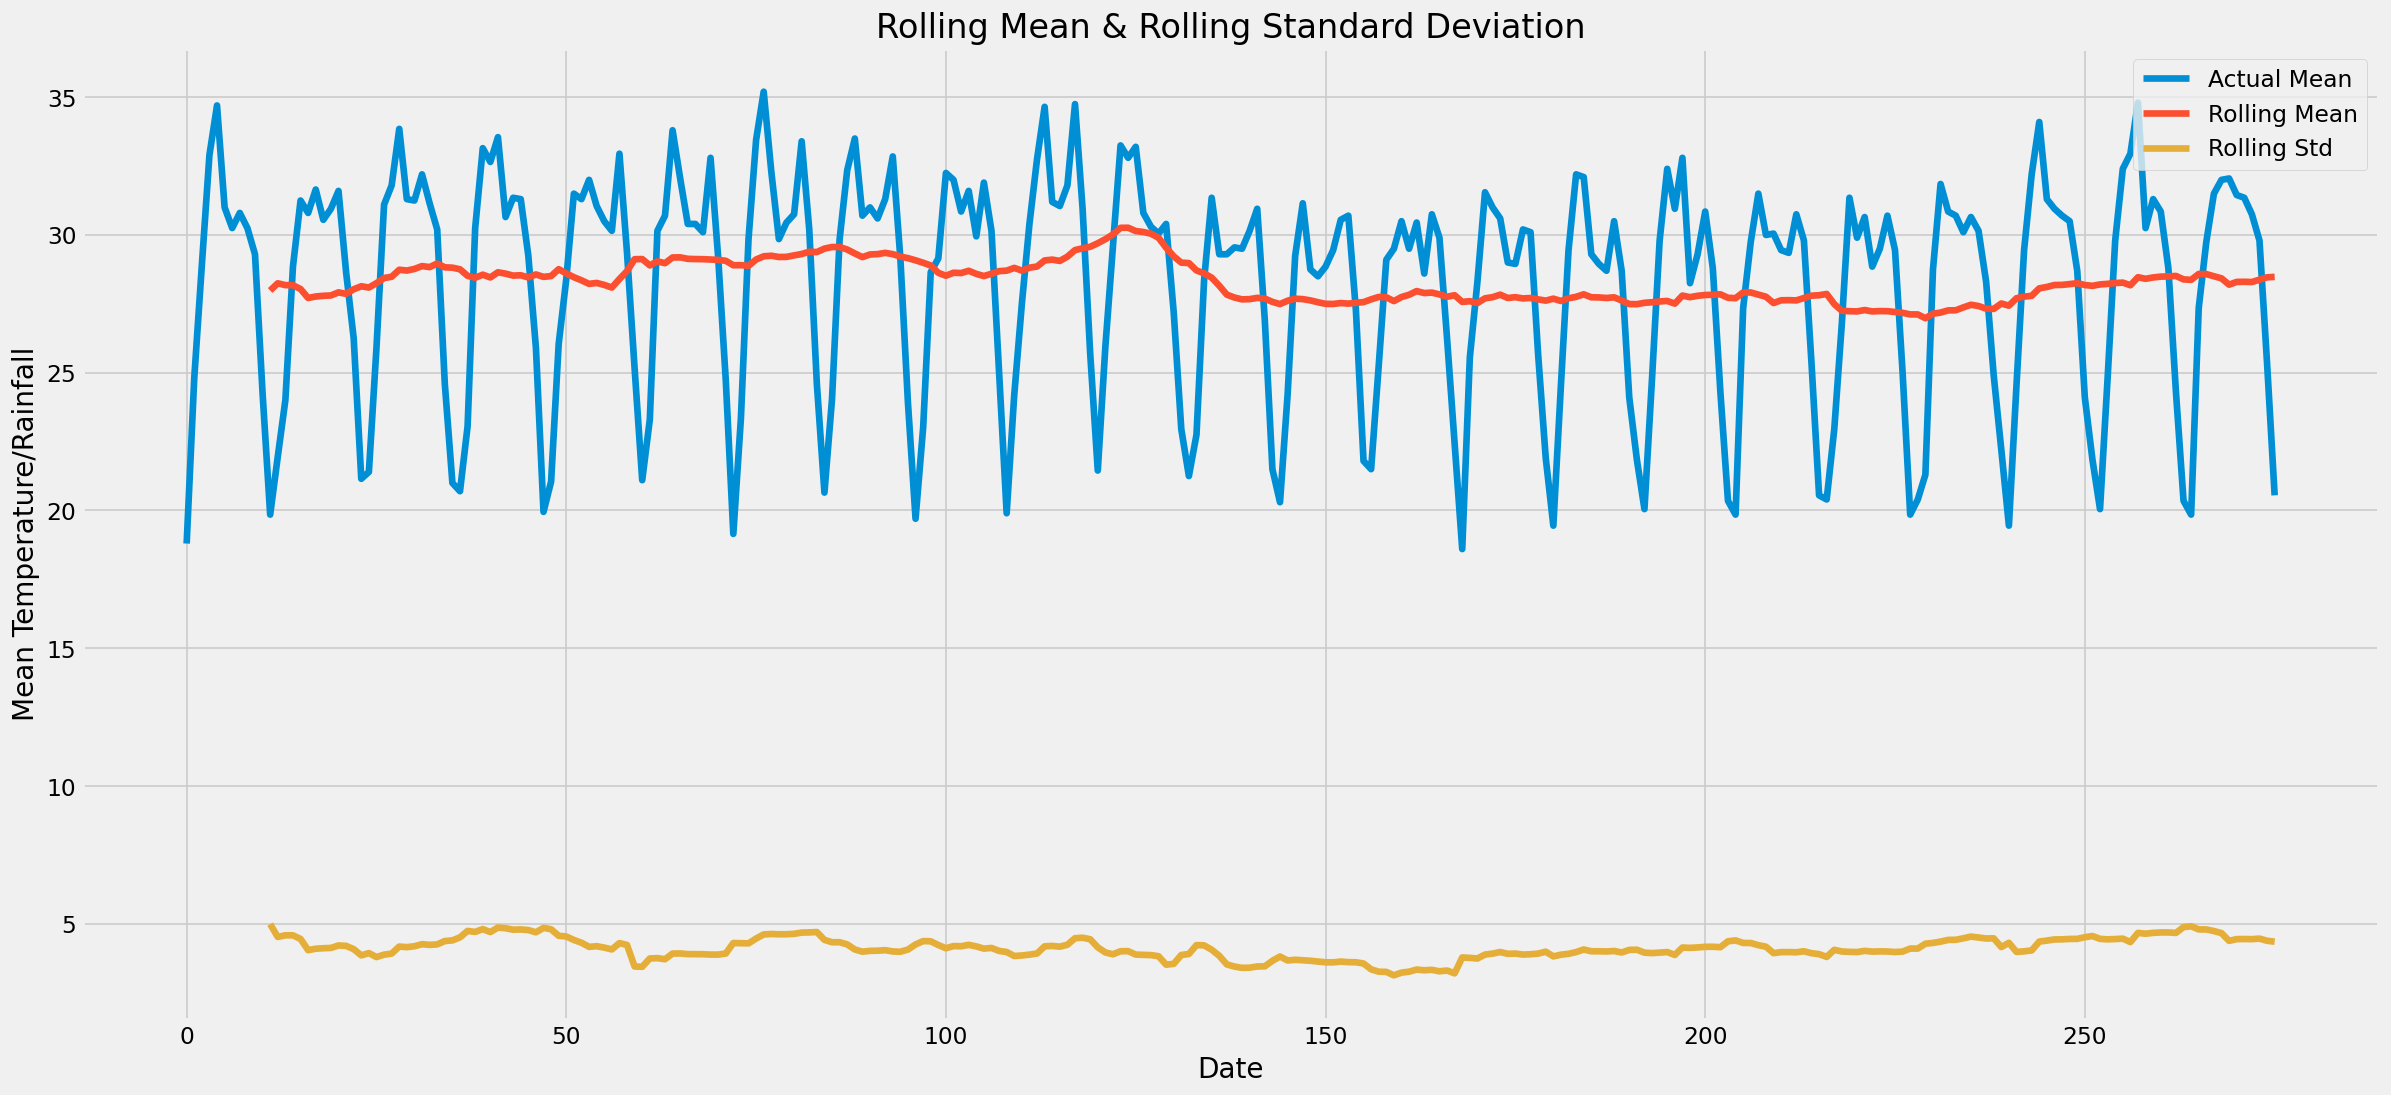

Test statistic:  -2.470397584295257
Critical Values: {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}


In [ ]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df2.Temperature)
perform_dickey_fuller_test(train_df2.Temperature)

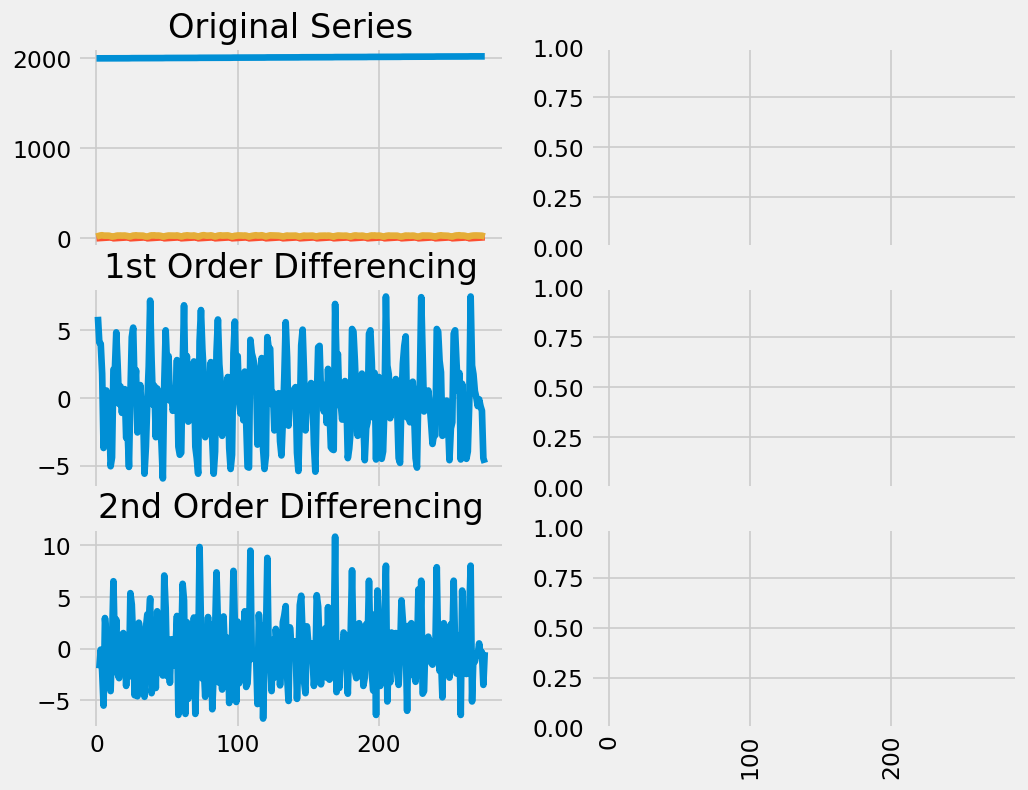

In [ ]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df2.values);
axes[0, 0].set_title('Original Series')

# 1st Differencing
axes[1, 0].plot(train_df2.Temperature.diff().values);
axes[1, 0].set_title('1st Order Differencing')

# 2nd Differencing
axes[2, 0].plot(train_df2.Temperature.diff().diff().values);
axes[2, 0].set_title('2nd Order Differencing')

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
stepwise_fit2 = auto_arima(train2, trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1222.879, Time=1.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1559.473, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1364.614, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1363.201, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2635.880, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1253.748, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1229.374, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1224.401, Time=0.71 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1222.625, Time=0.68 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1229.039, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=1224.544, Time=0.90 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, T

In [ ]:
val_pred2 = stepwise_fit2.predict(len(test2))
df2_val = pd.DataFrame({'Actual Temperature': test2, 'Predicted Temperature': val_pred2})
df2_val[df2_val['Predicted Temperature']>=0]

,Actual Temperature,Predicted Temperature
276,20.40,20.923844
277,22.95,24.594561
278,26.80,28.332117
279,31.35,29.230435
280,31.90,28.345514
281,32.65,27.943920
282,30.85,28.121021
283,31.50,28.263059
284,30.70,28.238197
285,29.45,28.194443


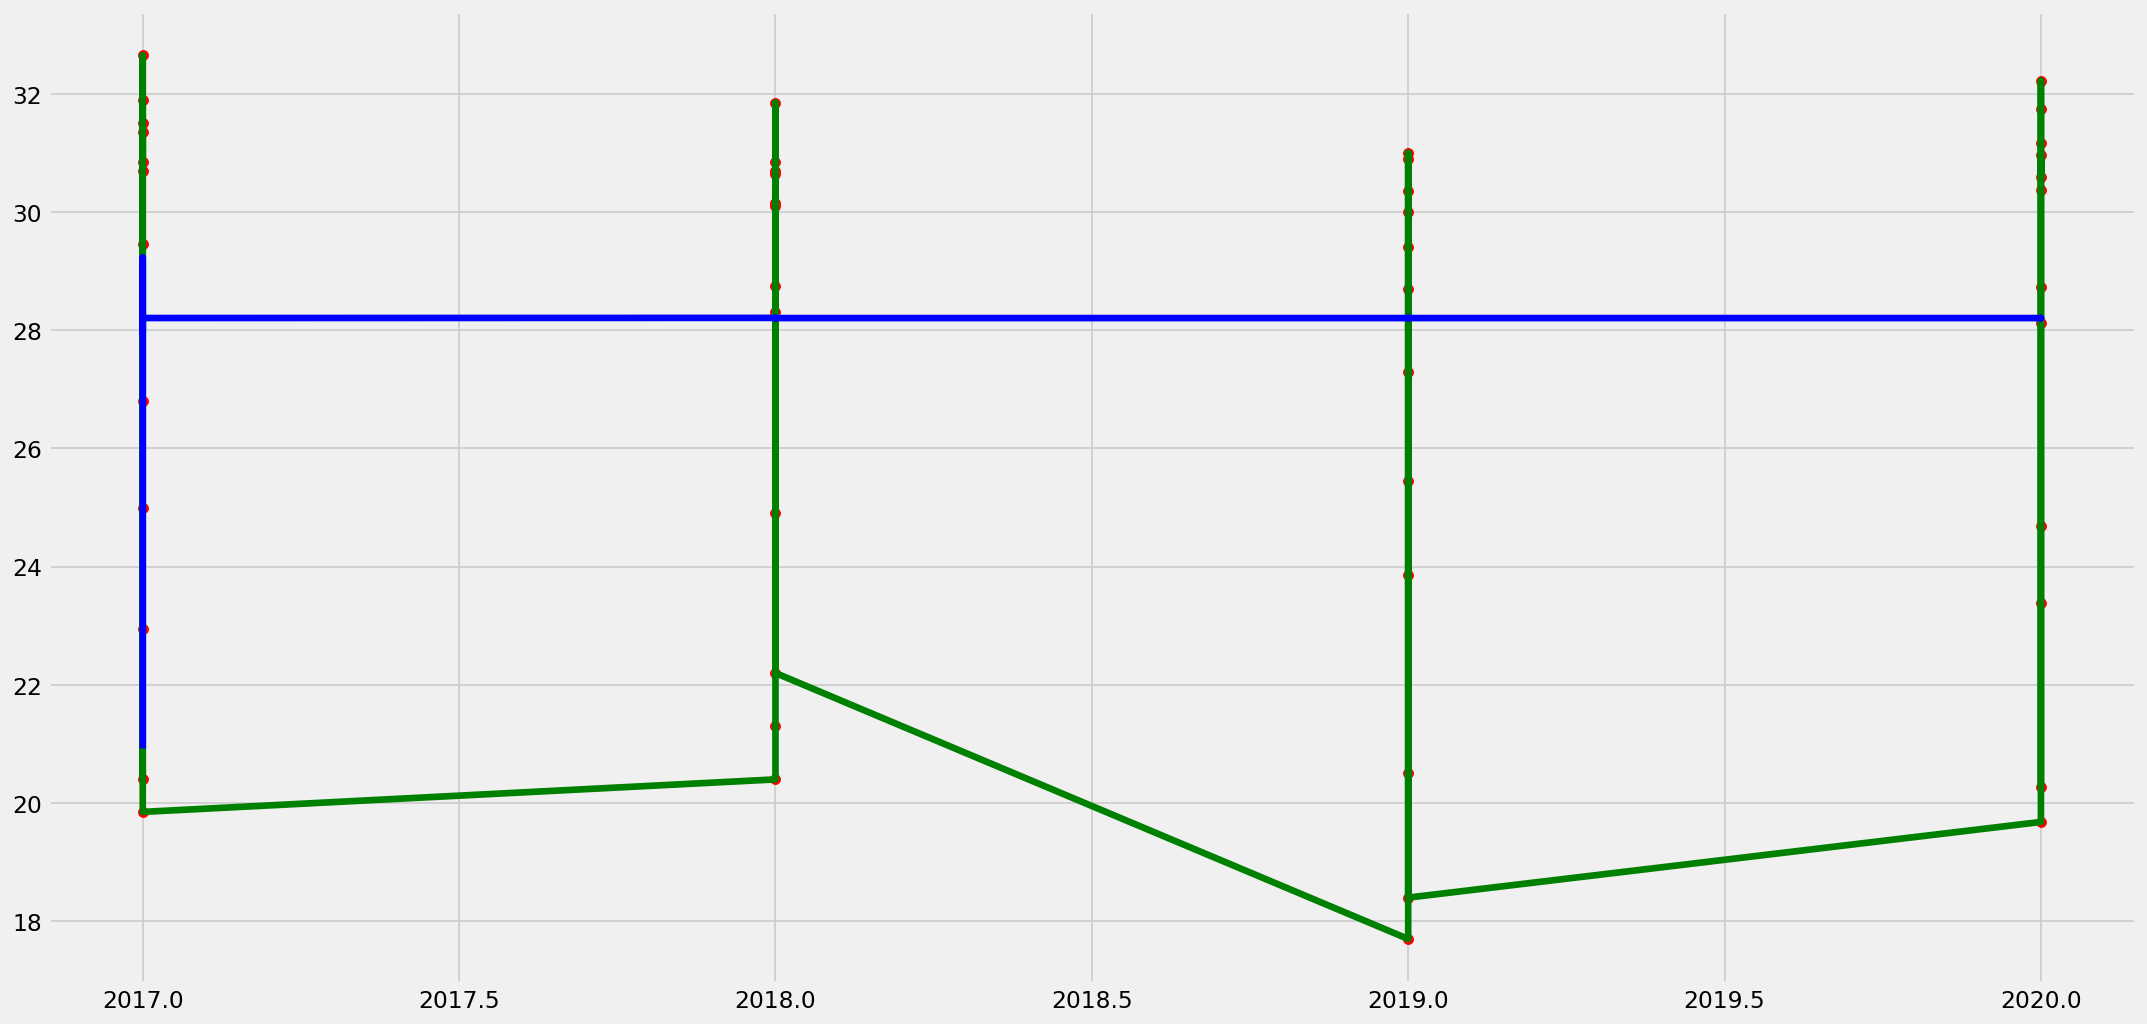

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(test_df2['Year'],test2,color='red')
plt.plot(test_df2['Year'],test2,color='green')
plt.plot(test_df2['Year'],val_pred2,color='blue')

In [ ]:
Y_exp_pred2 = stepwise_fit2.predict(len(test2)+228)
df2 = pd.DataFrame({'Predicted Temperature': Y_exp_pred2})
df2[df2['Predicted Temperature']>=0]

,Predicted Temperature
276,20.923844
277,24.594561
278,28.332117
279,29.230435
280,28.345514
...,...
547,28.204898
548,28.204898
549,28.204898
550,28.204898


In [ ]:
avg_Y_val = (test[276]+test[277]+test[278]+test[279]+test[280]+test[281]+test[282]+test[283]+test[284]+test[285]+test[286]+test[287]+test[288]+test[289]+test[290]+test[291]+test[292]+test[293]+test[294]+test[295]+test[296]+test[297]+test[298]+test[299]+test[300]+test[301]+test[302]+test[303]+test[304]+test[305]+test[306]+test[307]+test[308]+test[309]+test[310]+test[311]+test[312]+test[313]+test[314]+test[315]+test[316]++test[317]+test[318]+test[319]+test[320]+test[321]+test[322]+test[323])/48
avg_Y_val2 = (test2[276]+test2[277]+test2[278]+test2[279]+test2[280]+test2[281]+test2[282]+test2[283]+test2[284]+test2[285]+test2[286]+test2[287]+test2[288]+test2[289]+test2[290]+test2[291]+test2[292]+test2[293]+test2[294]+test2[295]+test2[296]+test2[297]+test2[298]+test2[299]+test2[300]+test2[301]+test2[302]+test2[303]+test2[304]+test2[305]+test2[306]+test2[307]+test2[308]+test2[309]+test2[310]+test2[311]+test2[312]+test2[313]+test2[314]+test2[315]+test2[316]++test2[317]+test2[318]+test2[319]+test2[320]+test2[321]+test2[322]+test2[323])/48

In [ ]:
drought_2017 = (avg_Y_val / ((val_pred[276]+val_pred[277]+val_pred[278]+val_pred[279]+val_pred[280]+val_pred[281]+val_pred[282]+val_pred[283]+val_pred[284]+val_pred[285]+val_pred[286]+val_pred[287])/12)) * ((avg_Y_val2 / ((val_pred2[276]+val_pred2[277]+val_pred2[278]+val_pred2[279]+val_pred2[280]+val_pred2[281]+val_pred2[282]+val_pred2[283]+val_pred2[284]+val_pred2[285]+val_pred2[286]+val_pred2[287])/12))**0.5)
drought_2017_actual = (avg_Y_val / ((test[276]+test[277]+test[278]+test[279]+test[280]+test[281]+test[282]+test[283]+test[284]+test[285]+test[286]+test[287])/12)) * ((avg_Y_val2 / ((test2[276]+test2[277]+test2[278]+test2[279]+test2[280]+test2[281]+test2[282]+test2[283]+test2[284]+test2[285]+test2[286]+test2[287])/12))**0.5)
drought_2018 = (avg_Y_val / ((val_pred[288]+val_pred[289]+val_pred[290]+val_pred[291]+val_pred[292]+val_pred[293]+val_pred[294]+val_pred[295]+val_pred[296]+val_pred[297]+val_pred[298]+val_pred[299])/12)) * ((avg_Y_val2 / ((val_pred2[288]+val_pred2[289]+val_pred2[290]+val_pred2[291]+val_pred2[292]+val_pred2[293]+val_pred2[294]+val_pred2[295]+val_pred2[296]+val_pred2[297]+val_pred2[298]+val_pred2[299])/12))**0.5)
drought_2018_actual = (avg_Y_val / ((test[288]+test[289]+test[290]+test[291]+test[292]+test[293]+test[294]+test[295]+test[296]+test[297]+test[298]+test[299])/12)) * ((avg_Y_val2 / ((test2[288]+test2[289]+test2[290]+test2[291]+test2[292]+test2[293]+test2[294]+test2[295]+test2[296]+test2[297]+test2[298]+test2[299])/12))**0.5)
drought_2019 = (avg_Y_val / ((val_pred[300]+val_pred[301]+val_pred[302]+val_pred[303]+val_pred[304]+val_pred[305]+val_pred[306]+val_pred[307]+val_pred[308]+val_pred[309]+val_pred[310]+val_pred[311])/12)) * ((avg_Y_val2 / ((val_pred2[300]+val_pred2[301]+val_pred2[302]+val_pred2[303]+val_pred2[304]+val_pred2[305]+val_pred2[306]+val_pred2[307]+val_pred2[308]+val_pred2[309]+val_pred2[310]+val_pred2[311])/12))**0.5)
drought_2019_actual = (avg_Y_val / ((test[300]+test[301]+test[302]+test[303]+test[304]+test[305]+test[306]+test[307]+test[308]+test[309]+test[310]+test[311])/12)) * ((avg_Y_val2 / ((test2[300]+test2[301]+test2[302]+test2[303]+test2[304]+test2[305]+test2[306]+test2[307]+test2[308]+test2[309]+test2[310]+test2[311])/12))**0.5)
drought_2020 = (avg_Y_val / ((val_pred[312]+val_pred[313]+val_pred[314]+val_pred[315]+val_pred[316]+val_pred[317]+val_pred[318]+val_pred[319]+val_pred[320]+val_pred[321]+val_pred[322]+val_pred[323])/12)) * ((avg_Y_val2 / ((val_pred2[312]+val_pred2[313]+val_pred2[314]+val_pred2[315]+val_pred2[316]+val_pred2[317]+val_pred2[318]+val_pred2[319]+val_pred2[320]+val_pred2[321]+val_pred2[322]+val_pred2[323])/12))**0.5)
drought_2020_actual = (avg_Y_val / ((test[312]+test[313]+test[314]+test[315]+test[316]+test[317]+test[318]+test[319]+test[320]+test[321]+test[322]+test[323])/12)) * ((avg_Y_val2 / ((test2[312]+test2[313]+test2[314]+test2[315]+test2[316]+test2[317]+test2[318]+test2[319]+test2[320]+test2[321]+test2[322]+test2[323])/12))**0.5)
drought_2021 = (avg_Y_val / ((Y_exp_pred[324]+Y_exp_pred[325]+Y_exp_pred[326]+Y_exp_pred[327]+Y_exp_pred[328]+Y_exp_pred[329]+Y_exp_pred[330]+Y_exp_pred[331]+Y_exp_pred[332]+Y_exp_pred[333]+Y_exp_pred[334]+Y_exp_pred[335])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[324]+Y_exp_pred2[325]+Y_exp_pred2[326]+Y_exp_pred2[327]+Y_exp_pred2[328]+Y_exp_pred2[329]+Y_exp_pred2[330]+Y_exp_pred2[331]+Y_exp_pred2[332]+Y_exp_pred2[333]+Y_exp_pred2[334]+Y_exp_pred2[335])/12))**0.5)
drought_2022 = (avg_Y_val / ((Y_exp_pred[336]+Y_exp_pred[337]+Y_exp_pred[338]+Y_exp_pred[339]+Y_exp_pred[340]+Y_exp_pred[341]+Y_exp_pred[342]+Y_exp_pred[343]+Y_exp_pred[344]+Y_exp_pred[345]+Y_exp_pred[346]+Y_exp_pred[347])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[336]+Y_exp_pred2[337]+Y_exp_pred2[338]+Y_exp_pred2[339]+Y_exp_pred2[340]+Y_exp_pred2[341]+Y_exp_pred2[342]+Y_exp_pred2[343]+Y_exp_pred2[344]+Y_exp_pred2[345]+Y_exp_pred2[346]+Y_exp_pred2[347])/12))**0.5)
drought_2023 = (avg_Y_val / ((Y_exp_pred[348]+Y_exp_pred[349]+Y_exp_pred[350]+Y_exp_pred[351]+Y_exp_pred[352]+Y_exp_pred[353]+Y_exp_pred[354]+Y_exp_pred[355]+Y_exp_pred[356]+Y_exp_pred[357]+Y_exp_pred[358]+Y_exp_pred[359])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[348]+Y_exp_pred2[349]+Y_exp_pred2[350]+Y_exp_pred2[351]+Y_exp_pred2[352]+Y_exp_pred2[353]+Y_exp_pred2[354]+Y_exp_pred2[355]+Y_exp_pred2[356]+Y_exp_pred2[357]+Y_exp_pred2[358]+Y_exp_pred2[359])/12))**0.5)
drought_2024 = (avg_Y_val / ((Y_exp_pred[360]+Y_exp_pred[361]+Y_exp_pred[362]+Y_exp_pred[363]+Y_exp_pred[364]+Y_exp_pred[365]+Y_exp_pred[366]+Y_exp_pred[367]+Y_exp_pred[368]+Y_exp_pred[369]+Y_exp_pred[370]+Y_exp_pred[371])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[360]+Y_exp_pred2[361]+Y_exp_pred2[362]+Y_exp_pred2[363]+Y_exp_pred2[364]+Y_exp_pred2[365]+Y_exp_pred2[366]+Y_exp_pred2[367]+Y_exp_pred2[368]+Y_exp_pred2[369]+Y_exp_pred2[370]+Y_exp_pred2[371])/12))**0.5)
drought_2025 = (avg_Y_val / ((Y_exp_pred[372]+Y_exp_pred[373]+Y_exp_pred[374]+Y_exp_pred[375]+Y_exp_pred[376]+Y_exp_pred[377]+Y_exp_pred[378]+Y_exp_pred[379]+Y_exp_pred[380]+Y_exp_pred[381]+Y_exp_pred[382]+Y_exp_pred[383])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[372]+Y_exp_pred2[373]+Y_exp_pred2[374]+Y_exp_pred2[375]+Y_exp_pred2[376]+Y_exp_pred2[377]+Y_exp_pred2[378]+Y_exp_pred2[379]+Y_exp_pred2[380]+Y_exp_pred2[381]+Y_exp_pred2[382]+Y_exp_pred2[383])/12))**0.5)
drought_2026 = (avg_Y_val / ((Y_exp_pred[384]+Y_exp_pred[385]+Y_exp_pred[386]+Y_exp_pred[387]+Y_exp_pred[388]+Y_exp_pred[389]+Y_exp_pred[390]+Y_exp_pred[391]+Y_exp_pred[392]+Y_exp_pred[393]+Y_exp_pred[394]+Y_exp_pred[395])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[384]+Y_exp_pred2[385]+Y_exp_pred2[386]+Y_exp_pred2[387]+Y_exp_pred2[388]+Y_exp_pred2[389]+Y_exp_pred2[390]+Y_exp_pred2[391]+Y_exp_pred2[392]+Y_exp_pred2[393]+Y_exp_pred2[394]+Y_exp_pred2[395])/12))**0.5)
drought_2027 = (avg_Y_val / ((Y_exp_pred[396]+Y_exp_pred[397]+Y_exp_pred[398]+Y_exp_pred[399]+Y_exp_pred[400]+Y_exp_pred[401]+Y_exp_pred[402]+Y_exp_pred[403]+Y_exp_pred[404]+Y_exp_pred[405]+Y_exp_pred[406]+Y_exp_pred[407])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[396]+Y_exp_pred2[397]+Y_exp_pred2[398]+Y_exp_pred2[399]+Y_exp_pred2[400]+Y_exp_pred2[401]+Y_exp_pred2[402]+Y_exp_pred2[403]+Y_exp_pred2[404]+Y_exp_pred2[405]+Y_exp_pred2[406]+Y_exp_pred2[407])/12))**0.5)
drought_2028 = (avg_Y_val / ((Y_exp_pred[408]+Y_exp_pred[409]+Y_exp_pred[410]+Y_exp_pred[411]+Y_exp_pred[412]+Y_exp_pred[413]+Y_exp_pred[414]+Y_exp_pred[415]+Y_exp_pred[416]+Y_exp_pred[417]+Y_exp_pred[418]+Y_exp_pred[419])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[408]+Y_exp_pred2[409]+Y_exp_pred2[410]+Y_exp_pred2[411]+Y_exp_pred2[412]+Y_exp_pred2[413]+Y_exp_pred2[414]+Y_exp_pred2[415]+Y_exp_pred2[416]+Y_exp_pred2[417]+Y_exp_pred2[418]+Y_exp_pred2[419])/12))**0.5)
drought_2029 = (avg_Y_val / ((Y_exp_pred[420]+Y_exp_pred[421]+Y_exp_pred[422]+Y_exp_pred[423]+Y_exp_pred[424]+Y_exp_pred[425]+Y_exp_pred[426]+Y_exp_pred[427]+Y_exp_pred[428]+Y_exp_pred[429]+Y_exp_pred[430]+Y_exp_pred[431])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[420]+Y_exp_pred2[421]+Y_exp_pred2[422]+Y_exp_pred2[423]+Y_exp_pred2[424]+Y_exp_pred2[425]+Y_exp_pred2[426]+Y_exp_pred2[427]+Y_exp_pred2[428]+Y_exp_pred2[429]+Y_exp_pred2[430]+Y_exp_pred2[431])/12))**0.5)
drought_2030 = (avg_Y_val / ((Y_exp_pred[432]+Y_exp_pred[433]+Y_exp_pred[434]+Y_exp_pred[435]+Y_exp_pred[436]+Y_exp_pred[437]+Y_exp_pred[438]+Y_exp_pred[439]+Y_exp_pred[440]+Y_exp_pred[441]+Y_exp_pred[442]+Y_exp_pred[443])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[432]+Y_exp_pred2[433]+Y_exp_pred2[434]+Y_exp_pred2[435]+Y_exp_pred2[436]+Y_exp_pred2[437]+Y_exp_pred2[438]+Y_exp_pred2[439]+Y_exp_pred2[440]+Y_exp_pred2[441]+Y_exp_pred2[442]+Y_exp_pred2[443])/12))**0.5)
drought_2031 = (avg_Y_val / ((Y_exp_pred[444]+Y_exp_pred[445]+Y_exp_pred[446]+Y_exp_pred[447]+Y_exp_pred[448]+Y_exp_pred[449]+Y_exp_pred[450]+Y_exp_pred[451]+Y_exp_pred[452]+Y_exp_pred[453]+Y_exp_pred[454]+Y_exp_pred[455])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[444]+Y_exp_pred2[445]+Y_exp_pred2[446]+Y_exp_pred2[447]+Y_exp_pred2[448]+Y_exp_pred2[449]+Y_exp_pred2[450]+Y_exp_pred2[451]+Y_exp_pred2[452]+Y_exp_pred2[453]+Y_exp_pred2[454]+Y_exp_pred2[455])/12))**0.5)
drought_2032 = (avg_Y_val / ((Y_exp_pred[456]+Y_exp_pred[457]+Y_exp_pred[458]+Y_exp_pred[459]+Y_exp_pred[460]+Y_exp_pred[461]+Y_exp_pred[462]+Y_exp_pred[463]+Y_exp_pred[464]+Y_exp_pred[465]+Y_exp_pred[466]+Y_exp_pred[467])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[456]+Y_exp_pred2[457]+Y_exp_pred2[458]+Y_exp_pred2[459]+Y_exp_pred2[460]+Y_exp_pred2[461]+Y_exp_pred2[462]+Y_exp_pred2[463]+Y_exp_pred2[464]+Y_exp_pred2[465]+Y_exp_pred2[466]+Y_exp_pred2[467])/12))**0.5)
drought_2033 = (avg_Y_val / ((Y_exp_pred[468]+Y_exp_pred[469]+Y_exp_pred[470]+Y_exp_pred[471]+Y_exp_pred[472]+Y_exp_pred[473]+Y_exp_pred[474]+Y_exp_pred[475]+Y_exp_pred[476]+Y_exp_pred[477]+Y_exp_pred[478]+Y_exp_pred[479])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[468]+Y_exp_pred2[469]+Y_exp_pred2[470]+Y_exp_pred2[471]+Y_exp_pred2[472]+Y_exp_pred2[473]+Y_exp_pred2[474]+Y_exp_pred2[475]+Y_exp_pred2[476]+Y_exp_pred2[477]+Y_exp_pred2[478]+Y_exp_pred2[479])/12))**0.5)
drought_2034 = (avg_Y_val / ((Y_exp_pred[480]+Y_exp_pred[481]+Y_exp_pred[482]+Y_exp_pred[483]+Y_exp_pred[484]+Y_exp_pred[485]+Y_exp_pred[486]+Y_exp_pred[487]+Y_exp_pred[488]+Y_exp_pred[489]+Y_exp_pred[490]+Y_exp_pred[491])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[480]+Y_exp_pred2[481]+Y_exp_pred2[482]+Y_exp_pred2[483]+Y_exp_pred2[484]+Y_exp_pred2[485]+Y_exp_pred2[486]+Y_exp_pred2[487]+Y_exp_pred2[488]+Y_exp_pred2[489]+Y_exp_pred2[490]+Y_exp_pred2[491])/12))**0.5)
drought_2035 = (avg_Y_val / ((Y_exp_pred[492]+Y_exp_pred[493]+Y_exp_pred[494]+Y_exp_pred[495]+Y_exp_pred[496]+Y_exp_pred[497]+Y_exp_pred[498]+Y_exp_pred[499]+Y_exp_pred[500]+Y_exp_pred[501]+Y_exp_pred[502]+Y_exp_pred[503])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[492]+Y_exp_pred2[493]+Y_exp_pred2[494]+Y_exp_pred2[495]+Y_exp_pred2[496]+Y_exp_pred2[497]+Y_exp_pred2[498]+Y_exp_pred2[499]+Y_exp_pred2[500]+Y_exp_pred2[501]+Y_exp_pred2[502]+Y_exp_pred2[503])/12))**0.5)
drought_2036 = (avg_Y_val / ((Y_exp_pred[504]+Y_exp_pred[505]+Y_exp_pred[506]+Y_exp_pred[507]+Y_exp_pred[508]+Y_exp_pred[509]+Y_exp_pred[510]+Y_exp_pred[511]+Y_exp_pred[512]+Y_exp_pred[513]+Y_exp_pred[514]+Y_exp_pred[515])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[504]+Y_exp_pred2[505]+Y_exp_pred2[506]+Y_exp_pred2[507]+Y_exp_pred2[508]+Y_exp_pred2[509]+Y_exp_pred2[510]+Y_exp_pred2[511]+Y_exp_pred2[512]+Y_exp_pred2[513]+Y_exp_pred2[514]+Y_exp_pred2[515])/12))**0.5)
drought_2037 = (avg_Y_val / ((Y_exp_pred[516]+Y_exp_pred[517]+Y_exp_pred[518]+Y_exp_pred[519]+Y_exp_pred[520]+Y_exp_pred[521]+Y_exp_pred[522]+Y_exp_pred[523]+Y_exp_pred[524]+Y_exp_pred[525]+Y_exp_pred[526]+Y_exp_pred[527])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[516]+Y_exp_pred2[517]+Y_exp_pred2[518]+Y_exp_pred2[519]+Y_exp_pred2[520]+Y_exp_pred2[521]+Y_exp_pred2[522]+Y_exp_pred2[523]+Y_exp_pred2[524]+Y_exp_pred2[525]+Y_exp_pred2[526]+Y_exp_pred2[527])/12))**0.5)
drought_2038 = (avg_Y_val / ((Y_exp_pred[528]+Y_exp_pred[529]+Y_exp_pred[530]+Y_exp_pred[531]+Y_exp_pred[532]+Y_exp_pred[533]+Y_exp_pred[534]+Y_exp_pred[535]+Y_exp_pred[536]+Y_exp_pred[537]+Y_exp_pred[538]+Y_exp_pred[539])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[528]+Y_exp_pred2[529]+Y_exp_pred2[530]+Y_exp_pred2[531]+Y_exp_pred2[532]+Y_exp_pred2[533]+Y_exp_pred2[534]+Y_exp_pred2[535]+Y_exp_pred2[536]+Y_exp_pred2[537]+Y_exp_pred2[538]+Y_exp_pred2[539])/12))**0.5)
drought_2039 = (avg_Y_val / ((Y_exp_pred[540]+Y_exp_pred[541]+Y_exp_pred[542]+Y_exp_pred[543]+Y_exp_pred[544]+Y_exp_pred[545]+Y_exp_pred[546]+Y_exp_pred[547]+Y_exp_pred[548]+Y_exp_pred[549]+Y_exp_pred[550]+Y_exp_pred[551])/12)) * ((avg_Y_val2 / ((Y_exp_pred2[540]+Y_exp_pred2[541]+Y_exp_pred2[542]+Y_exp_pred2[543]+Y_exp_pred2[544]+Y_exp_pred2[545]+Y_exp_pred2[546]+Y_exp_pred2[547]+Y_exp_pred2[548]+Y_exp_pred2[549]+Y_exp_pred2[550]+Y_exp_pred2[551])/12))**0.5)
print("Drought possibility in 2017:", drought_2017)
print("Drought possibility in 2017_actual:", drought_2017_actual)
print("Drought possibility in 2018:", drought_2018)
print("Drought possibility in 2018_actual:", drought_2018_actual)
print("Drought possibility in 2019:", drought_2019)
print("Drought possibility in 2019_actual:", drought_2019_actual)
print("Drought possibility in 2020:", drought_2020)
print("Drought possibility in 2020_actual:", drought_2020_actual)
print("Drought possibility in 2021:", drought_2021)
print("Drought possibility in 2022:", drought_2022)
print("Drought possibility in 2023:", drought_2023)
print("Drought possibility in 2024:", drought_2024)
print("Drought possibility in 2025:", drought_2025)
print("Drought possibility in 2026:", drought_2026)
print("Drought possibility in 2027:", drought_2027)
print("Drought possibility in 2028:", drought_2028)
print("Drought possibility in 2029:", drought_2029)
print("Drought possibility in 2030:", drought_2030)
print("Drought possibility in 2031:", drought_2031)
print("Drought possibility in 2032:", drought_2032)
print("Drought possibility in 2033:", drought_2033)
print("Drought possibility in 2034:", drought_2034)
print("Drought possibility in 2035:", drought_2035)
print("Drought possibility in 2036:", drought_2036)
print("Drought possibility in 2037:", drought_2037)
print("Drought possibility in 2038:", drought_2038)
print("Drought possibility in 2039:", drought_2039)

Drought possibility in 2017: 0.9215593589202253
Drought possibility in 2017_actual: 1.3113344980413666
Drought possibility in 2018: 0.9198954044448192
Drought possibility in 2018_actual: 1.287232422804771
Drought possibility in 2019: 0.919735473915546
Drought possibility in 2019_actual: 0.7120826052627675
Drought possibility in 2020: 0.9195751744603566
Drought possibility in 2020_actual: 0.9581322858546566
Drought possibility in 2021: 0.9194181382155389
Drought possibility in 2022: 0.9192643544853482
Drought possibility in 2023: 0.9191138100395553
Drought possibility in 2024: 0.9189664894805212
Drought possibility in 2025: 0.9188223753535435
Drought possibility in 2026: 0.9186814482547031
Drought possibility in 2027: 0.9185436869354155
Drought possibility in 2028: 0.9184090684037547
Drought possibility in 2029: 0.9182775680226035
Drought possibility in 2030: 0.9181491596047013
Drought possibility in 2031: 0.9180238155046563
Drought possibility in 2032: 0.9179015067079774
Drought possib

Text(0.5, 1.0, 'Drought index')

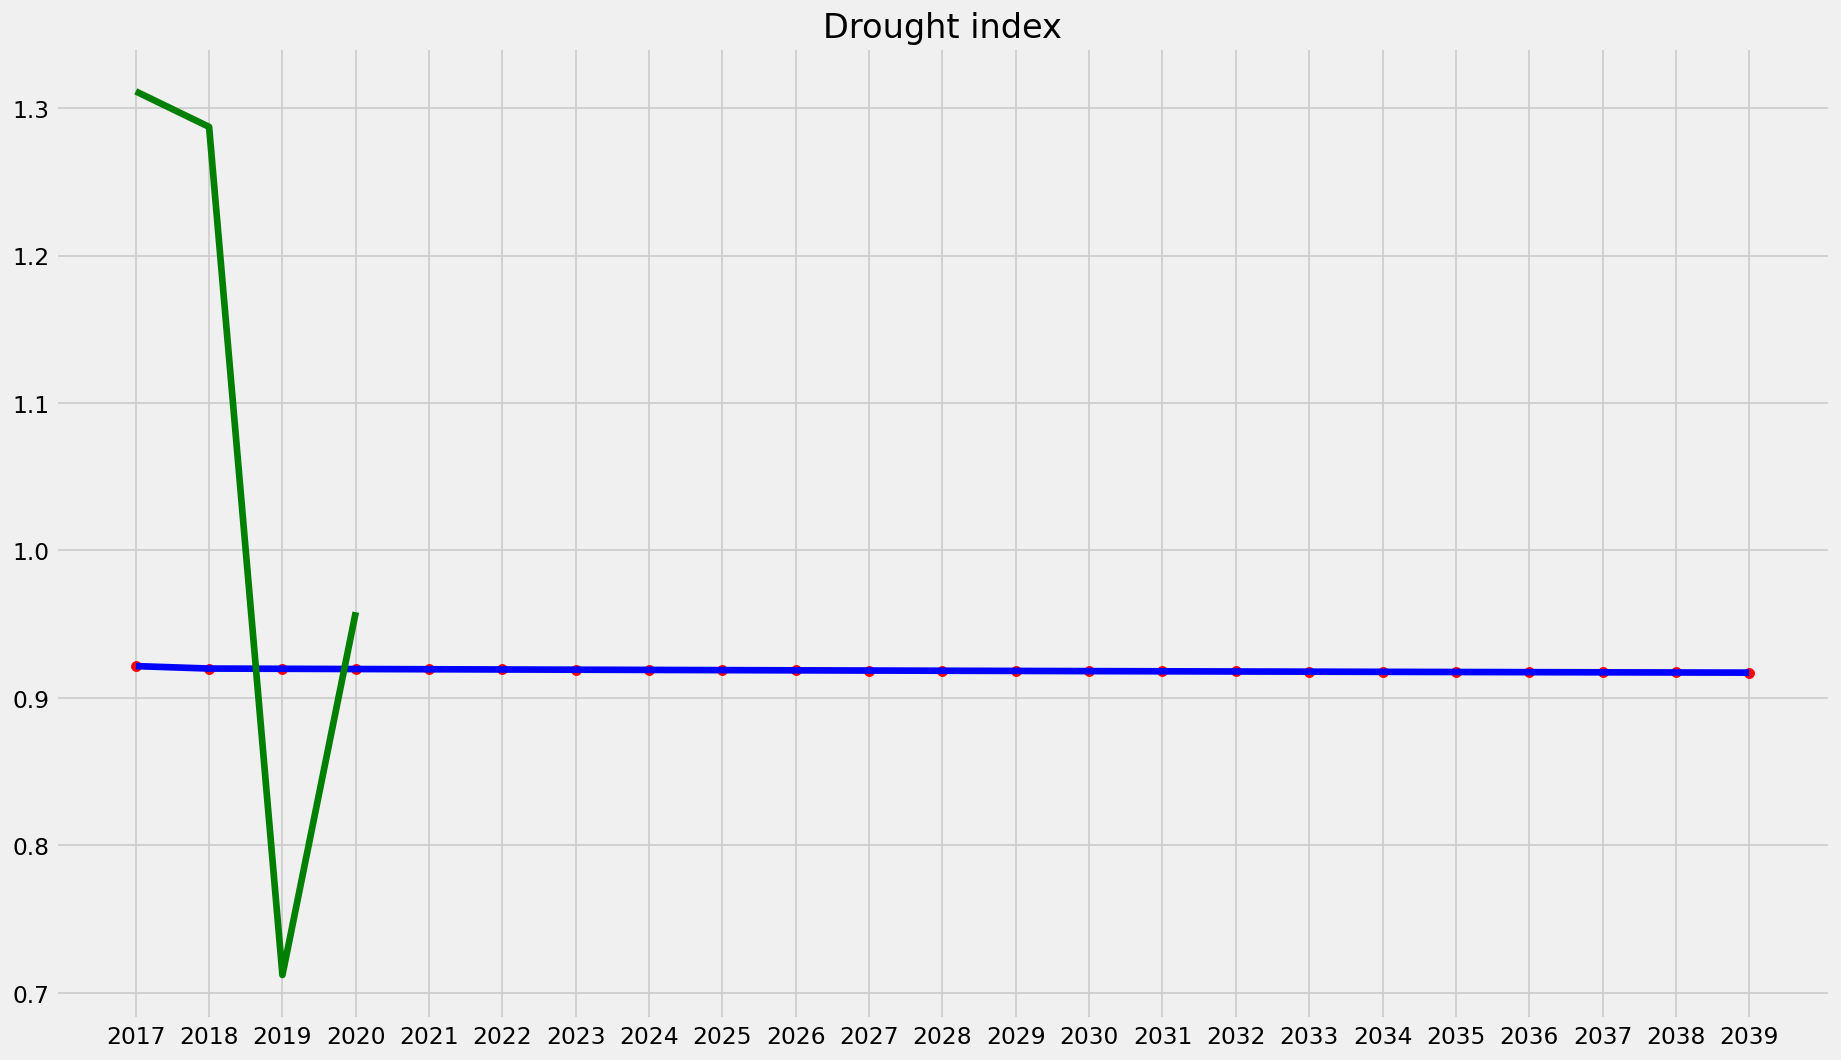

In [ ]:
drought = [0.9215593589202253, 0.9198954044448192, 0.919735473915546, 0.9195751744603566, 0.9194181382155389, 0.9192643544853482, 0.9191138100395553, 0.9189664894805212, 0.9188223753535435, 0.9186814482547031, 0.9185436869354155, 0.9184090684037547, 0.9182775680226035, 0.9181491596047013, 0.9180238155046563, 0.9179015067079774, 0.9177822029171948, 0.9176658726351314, 0.9175524832453821, 0.9174420010900746, 0.9173343915449615, 0.9172296190919064, 0.9171276473888356]
drought_actual = [1.3113344980413666, 1.287232422804771, 0.7120826052627675, 0.9581322858546566]
year = ['2017','2018','2019','2020','2021', '2022', '2023', '2024','2025','2026','2027','2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039']
year_val = ['2017','2018','2019','2020']
plt.figure(figsize=(17,10))
plt.scatter(year,drought,color='red')
plt.plot(year,drought,color='blue')
plt.plot(year_val,drought_actual,color='green')
plt.title('Drought index')